## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
 - 5.1 [Analysis Based on Airport and Carrier Flight Information?](#section501)<br>
    - 5.1.1 [What is the flight frequency of each NYC Airport in 2013? ](#section501)<br>
    - 5.1.2 [Which flight Carrier has maximum frequency of flights from  NYC in 2013? ](#section502)<br>
    - 5.1.3 [Which month has maximum flights from  NYC in 2013?](#section503)<br>
    - 5.1.4 [Which days have maximum number of flights departed from NYC in 2013?](#section504)<br>
    - 5.1.5 [How the flight distributed over the course of day?](#section505)<br>
    - 5.1.6 [Carrier/Airline Wise On Time Departure versus Delayed Arrival of flight which were departed On Time.](#section506)<br>
    - 5.1.7 [Is there any seasonal trend for top destination ORD  from NYC in 2013?](#section507)<br>
 - 5.2 [NYC Flight Delay Analysis](#section5B)<br>
    - 5.2.1 [Is there any seasonal pattern in flight departure delays?](#section5B1)<br>
    - 5.2.2 [How flight departure delays vary over the course of a day?](#section5B2)<br>
    - 5.2.3 [Carrier Wise flight delay analysis](#section5B3)<br>
    - 5.2.4 [Airport wise Flight Delay Analysis](#section5B4)<br>
    - 5.2.5 [Carrier/Airline wise Departure Delay versus Arrival Delay Percentage?](#section5B5)<br>
    - 5.2.6 [Carrier/Airline Wise Delayed Departure versus On time Arrival of flight which were departed delay](#section5B6)<br>
    - 5.2.7 [Carrier/Airline Wise On Time Departure versus Delayed Arrival of flight which were departed On Time.](#section5B7)<br>
    - 5.2.8 [Which is best suited Airport for top destination ORD from NYC in 2013?](#section5B8)<br>
 - 5.3 [Which is best airport in NYC in 2013?](#section5C)<br>
6. [Conclusion](#section600)<br>
7. [Actionable Insights](#section700)<br>
    
    

<a id="section1"></a>
## 1. Problem Statement

This dataset has flight data departing from New York, USA for Year 2013. 
We will do **Flight Delay analysis**.

<img src = 'flightImg.jpg'>

<a id="section2"></a>
## 2. Importing Packages

In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [3]:
# To display plots  within notebook cells
import matplotlib.pyplot as plt
%matplotlib inline                                  

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

#!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\jaya.joshi\appdata\local\continuum\anaconda3\lib\site-packages (4.7.1)


In [4]:
# Install chart_studio, please use this command. 

#!pip install chart-studio

In [4]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id="section3"></a>
## 3. Loading Data

In this **Data Visualization** sheet, dataset contains information about the **flight departing and arriving in Newyork, USA**.


### Importing Dataset

In [7]:
df_nyc_flight=pd.read_csv(r"Data\NYC_Flight_Data.csv")
df_nyc_flight.head(10)

df_nyc_flight.shape

(336776, 19)

<a id="section301"></a>
### Description of the Dataset

- This dataset provides the flight data departing from Newyork, USA .Various variables present in dataset includes dep_day,
  dep_time,arr_time,carrier etc.


- This DataSet comprises of __336776 observation of 19 columns.__ Below is the table showing name of columns and their description


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| year                           | Year for which flight data is provided.                                                    | 
| month                          | Month of the year.                                                                         | 
| day                            | Day of the month.                                                                          | 
| dep_time                       | Actual Departure Time of Flight.                                                           |
| sched_dep_time                 | Scheduled Departure Time of Flight.                                                        |
| dep_delay                      | Delay in Flight Departure. Negative values represent early departure                       |
| arr_time                       | Actual Arrival Time of Flight.                                                             |
| sched_arr_time                 | Scheduled Arrival Time of Flight.                                                          |
| arr_delay                      | Delay in Flight Arrival.Negative values represent early arrival                            |
| carrier                        | Airline company Name.                                                                      |
| flight                         | Flight Number (Unique route operated).                                                     |
| tailnum                        | Flight Registration Number.                                                                |
| origin                         | Departure Airport.                                                                         |
| dest                           | Destination Airport.                                                                       |
| air_time                       | Air Time                                                                                   |
| distance                       | Distance between origin and destination                                                    | 
| hour                           | Hour part of Departure time                                                                |
| minute                         | Minute part of Departure time                                                              |
| time_hour                      | Hour and Date of Departure                                                                 |

In [7]:
df_nyc_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


- ```info``` function gives us the following insights into the df_menu dataframe:
   - There are a total of **336776 samples (rows)** and **19 columns** in the dataframe.
   - There are **9 columns** with a **numeric** datatype , **5 columns** with an **object** and **5 columns** with an
     **float** datatype.
   - There are ** missing** values in **dep_time ,dep_delay ,tailnum ,airtime** columns.

In [8]:
df_nyc_flight.describe(include="all")
#df_nyc_flight[df_nyc_flight.dep_delay<0]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776,336776.000000,334264,336776,336776,327346.000000,336776.000000,336776.000000,336776.000000,336776
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,4043,3,105,NaN,NaN,NaN,NaN,6936
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UA,NaN,N725MQ,EWR,ORD,NaN,NaN,NaN,NaN,20-09-2013 08:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58665,NaN,575,120835,17283,NaN,NaN,NaN,NaN,94
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,NaN,1971.923620,NaN,NaN,NaN,150.686460,1039.912604,13.180247,26.230100,NaN
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,NaN,1632.471938,NaN,NaN,NaN,93.688305,733.233033,4.661316,19.300846,NaN
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,NaN,1.000000,NaN,NaN,NaN,20.000000,17.000000,1.000000,0.000000,NaN
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,NaN,553.000000,NaN,NaN,NaN,82.000000,502.000000,9.000000,8.000000,NaN
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,NaN,1496.000000,NaN,NaN,NaN,129.000000,872.000000,13.000000,29.000000,NaN
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,NaN,3465.000000,NaN,NaN,NaN,192.000000,1389.000000,17.000000,44.000000,NaN


- ```describe``` function gives us the following insights into the data:
      
     -  50% of flights are early departures and early arrivals.
      
     -  After comparing the **75%** and **max** values of the dep_delay and arr_delay we can see that there are **outliers** present . It is possible that some of those flight got cancelled and some data is wrong.
   

<a id="section302"></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __nyc_profiling_before_preprocessing.html__. 
- The file will be stored in the directory of notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it.
    

In [9]:
# To install pandas profiling please run this command.
#!pip install pandas-profiling --upgrade

import pandas_profiling

In [10]:
# To output pandas profiling report to an external html file.
# Saving the output as nyc_profiling_before_preprocessing.html
#profile = df_nyc_flight.profile_report(title='Pandas Profiling before Data Preprocessing')
#profile.to_file(output_file="nyc_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 19
- Number of observations: 336776
- Missing cells: 46595 (0.7%)


__Variables types__: 
- Numeric = 13
- Categorical = 6

<br>

- **Year** has **constant value "2013"**.

- **dep_time** and **dep_delay** has **8225 (2.5%) missing values**.

- **arr_time** has **8713(2.6%) missing values**.

- **arr_delay** and **air_time** has **9430(2.6%) missing values**.


- **dep_delay** is **highly correlated** with **arr_delay **.


- **distance** is **highly correlated** with **air_time**.


- **dest** has a **high cardinality (105 distinct values)**.


- **tailnum** has a **high cardinality (4043 distinct values)**.


- **time_hour** has a **high cardinality (6936 distinct values)**.



- **dep_delay** has a **skewness** of **4.8025** and **kurtosis** of **43.950**.

   - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 1301 is an outlier**).
  

- **arr_delay** has a **skewness** of **6.8953** and **kurtosis** of **29.233044**.

  - **Maximum value = 1272** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(14)**.


- **carrier** has data divided into **16** distinct values.
  
  - __UA(United Airlines)__ has the **highest** share with **58665** samples **(17.4% share)**,then **B6** has **54635** samples **(16.2% share)** and then **EV** has **54173** samples **(16.1% share).
 			
  
- **origin** has data divided into **3** distinct values.
  
  - __EWR__ has **120835** samples **(75.9% share)**,**JFK** has **111279** samples **33% share** and **LGA** has **104662** samples **(31.1% share)**.
  
  
- All the **remaining columns** can be studied in the same way.

<a id="section4"></a>
## 4. Data Preprocessing

<a id="section401"></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**

In [11]:
df_nyc_flight.head(20)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2013 5:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2013 6:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,1/1/2013 6:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2013 6:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,1/1/2013 6:00


- Since the column **year** has a **constant value** for all the samples, we will drop this column.


- Also the columns **time_hour** will be **dropped** because they **don't provide** any additional **insights** into the data. 


- We have dropped data where **air_time is NaN but dep_time is not NaN**. As dep_time with NaN value, we have considered it as Cancelled.

In [12]:
#df_nyc_flight.drop(['year','time_hour'],1,inplace=True)

df_nyc_flight.drop(df_nyc_flight[df_nyc_flight.air_time.isnull() & df_nyc_flight.dep_time.notnull()].index,axis=0,inplace=True)


- Added column **month_desc**,**dep_status** and **arr_status** .


- Column **flight** has all numerical value but it should be considered as Categorical.


In [13]:
from datetime import datetime
month={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

# to add month name column
df_nyc_flight['month_desc']=df_nyc_flight['month'].apply(lambda x:month[x])

#to add departure status
df_nyc_flight['dep_status']=df_nyc_flight['dep_delay'].apply(lambda x : 'OnTime' if x<=0 else ('Delayed' if x>0 else 'Cancelled') )

#to add arrival status
df_nyc_flight['arr_status']=df_nyc_flight['arr_delay'].apply(lambda x : 'OnTime' if x<=0 else('Delayed' if x>0 else 'Cancelled'))

df_nyc_flight['flight']

df_nyc_flight['week_day'] = df_nyc_flight['day'].astype(str)+'-'+df_nyc_flight['month'].astype(str).str.pad(2,"left",fillchar='0') +'-'+df_nyc_flight['year'].astype(str)#,'%d-%m-%Y' )#.dt.week_day

df_nyc_flight['week_day']=pd.to_datetime(df_nyc_flight['week_day'],errors="coerce").dt.dayofweek

df_nyc_flight.drop(['year','time_hour'],1,inplace=True)

df_nyc_flight['flight'].astype(str)



df_nyc_flight.head(10)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,month_desc,dep_status,arr_status,week_day
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Jan,Delayed,Delayed,1
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Jan,Delayed,Delayed,1
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Jan,Delayed,Delayed,1
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Jan,OnTime,OnTime,1
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Jan,OnTime,OnTime,1
5,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Jan,OnTime,Delayed,1
6,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Jan,OnTime,Delayed,1
7,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Jan,OnTime,OnTime,1
8,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Jan,OnTime,OnTime,1
9,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Jan,OnTime,Delayed,1


<a id="section402"></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __nyc_profiling_after_preprocessing.html__.

In [14]:
# To output pandas profiling report to an external html file.
# Saving the output as nyc_profiling_after_preprocessing.html

profile = df_nyc_flight.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="nyc_profiling_after_preprocessing.html")


# To output the pandas profiling report on the notebook.

#df_nyc_flight.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 22
- Number of observations: 335601
- Missing cells: 43787


__Variables types__: 
- Numeric = 15
- Categorical = 7


<br>



<a id="section5"></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id="section500"></a>
## 5.1 Analysis Based on Airport and Carrier Flight Information

<a id="section501"></a>
### 5.1.1 What is the flight frequency of each NYC Airport in 2013?

In [15]:
df_nyc_flight['origin'].value_counts()

EWR    120366
JFK    110942
LGA    104293
Name: origin, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the Flight proportion of each NYC Airport/Origin')

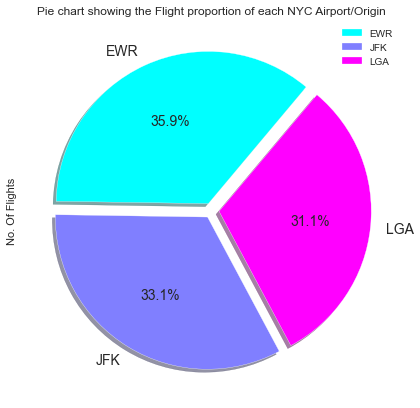

In [16]:
df_nyc_flight['origin'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%2.1f%%', 
                                               figsize=(15,7), shadow=True, startangle=50, legend=True, cmap='cool')

plt.ylabel('No. Of Flights')
plt.title('Pie chart showing the Flight proportion of each NYC Airport/Origin')

 - In 2013, **33.1%** of the flights are departing from both **JFK** and **LGA** outlets. The flight traffic in both airports are same.


- Around **35.9%** of flights departing from **EWR**. This is the **busiest airport** among **three airports in New York** in **2013**.

<a id ="section502"></a>
### 5.1.2 Which flight Carrier has maximum frequency of flights from  NYC in 2013?

In [17]:
df_nyc_flight['carrier'].value_counts()

UA    58468
B6    54515
EV    53925
DL    48007
AA    32583
MQ    26271
US    20494
9E    18338
WN    12236
VX    5147 
FL    3248 
AS    711  
F9    684  
YV    600  
HA    342  
OO    32   
Name: carrier, dtype: int64

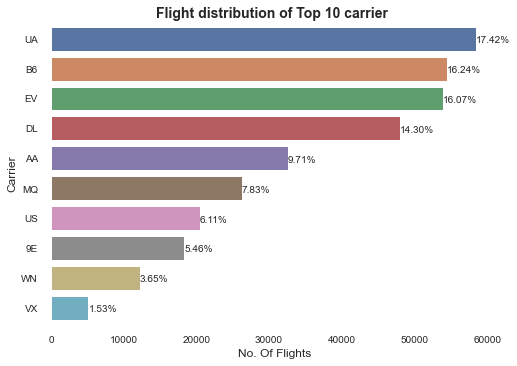

In [18]:

ax=sns.countplot(y='carrier',order=df_nyc_flight['carrier'].value_counts().head(10).index,data=df_nyc_flight,linewidth=1)
plt.title("Flight distribution of Top 10 carrier ",{'fontsize':14,'fontweight':'bold'})
plt.xlabel("No. Of Flights",{'fontsize':12})
plt.ylabel('Carrier',{'fontsize':12})
total = len(df_nyc_flight['carrier'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total )
        x = p.get_x() + p.get_width() + .05
        y = p.get_y() + p.get_height()/1.5
        ax.annotate(percentage, (x, y))
plt.show()

- **UA - United Airlines** has maximum number of flights departing from NYC Airport from our **Top 10 flight Carrier**.


- **17.42%** flights are operated by **United Airlines**,then **16.24%** by **B6 - JetBlue**.


- The **annotaion** in horizontal barshows the **percentage** of the **flights operated by each carrier** fron NYC Airport in 2013 .

<a id ="section503"></a>
### 5.1.3 Which month has maximum flights from  NYC in 2013?

In [19]:
df_nyc_flight['month'].value_counts().sort_index()

1     26919
2     24872
3     28763
4     28232
5     28691
6     28084
7     29233
8     29242
9     27462
10    28854
11    27204
12    28045
Name: month, dtype: int64

Text(0.5, 1.0, 'Flight frequency across Months')

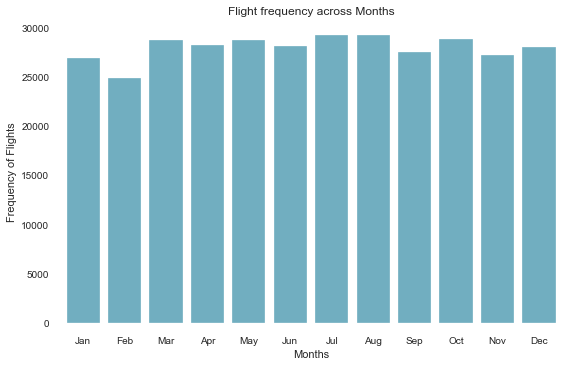

In [20]:
#df_nyc_flight['month'].value_counts().plot.bar()
rowOrder=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#fig,ax=plt.subplots(figsize=(12,9))
sns.catplot(x="month_desc",kind="count",data=df_nyc_flight,order=rowOrder,aspect=14/9,color="c")
plt.xlabel('Months')
plt.ylabel('Frequency of Flights')
plt.title('Flight frequency across Months')

- It shows that there is **peak** in no. of flights in the month of **July and August**. 


- In August, the weather in New York is hot, most of the New Yorkers go on vacation.


- **October and December** month also has high frequency of flights. As these are month of festivity, **Thanksgiving and Christmas** , people travels to their families to celebrate.

- **February**  has lowest number of flights



<a section="504"></a>
### 5.1.4 Which days have maximum number of flights departed from NYC in 2013?

In [21]:
df_nyc_flight['week_day'].value_counts().sort_index()


0    49542
1    48766
2    49211
3    49919
4    48736
5    42700
6    46727
Name: week_day, dtype: int64

([<matplotlib.axis.XTick at 0x13325baad48>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

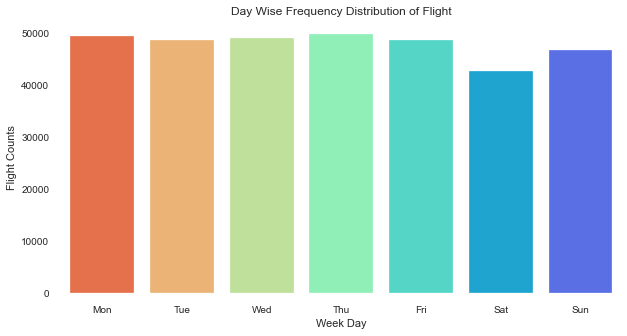

In [22]:
xticklbl=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(10,5))
sns.countplot('week_day',order=df_nyc_flight['week_day'].value_counts().sort_index().index,data=df_nyc_flight,palette='rainbow_r')
plt.title('Day Wise Frequency Distribution of Flight')
plt.ylabel('Flight Counts')
plt.xlabel('Week Day')
plt.xticks([0,1,2,3,4,5,6],xticklbl)

- **Thursday and Monday** are  **busiest week day** and **minimum flights** fly from NYC on **Saturday.** 

<a id ="section505"></a>
### 5.1.5 How the flight distributed over the course of day?

In [23]:

df_nyc_flight['hour'].unique()
df_nyc_flight['hour'].value_counts()

8     27176
6     25872
17    24327
15    23752
16    22885
7     22764
18    21698
14    21588
19    21368
9     20258
13    19886
12    18132
20    16697
10    16660
11    15985
21    10912
22    2636 
5     1949 
23    1055 
1     1    
Name: hour, dtype: int64

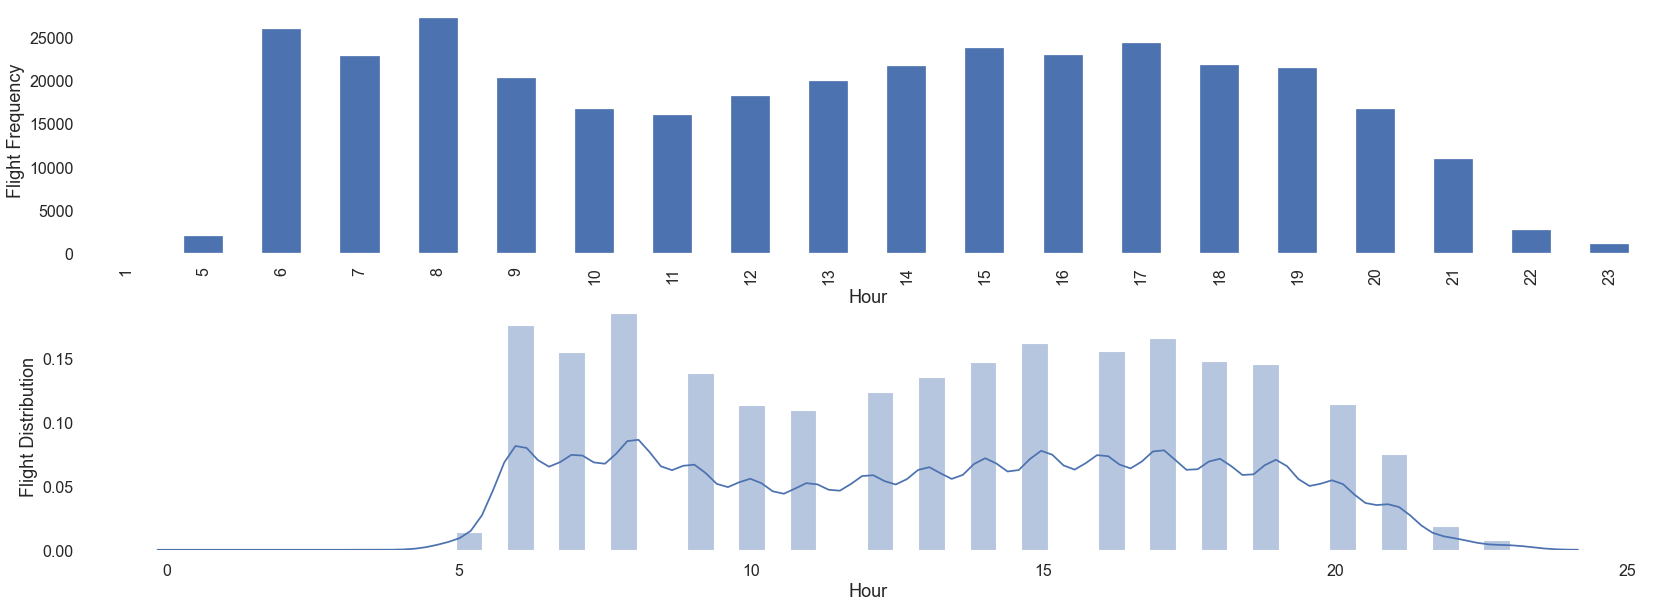

In [24]:
f,ax=plt.subplots(2,1,figsize=(28,10))
#binlist=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
#count,bin_edges=np.histogram(df_nyc_flight['hour'])
df_nyc_flight['hour'].value_counts().sort_index().plot(kind="bar",ax=ax[0])
sns.distplot(df_nyc_flight['hour'],color='b',ax=ax[1])
ax[0].set_ylabel("Flight Frequency",fontsize=18)
ax[0].set_xlabel("Hour",fontsize=18)
ax[1].set_xlabel("Hour",fontsize=18)
ax[1].set_ylabel("Flight Distribution",fontsize=18)
ax[0].tick_params(labelsize=16)
ax[1].tick_params(labelsize=16)

- It depicts that **maximum flight depart** between **6 a.m. to 10 a.m.** in the morning and **2 p.m. to 6 p.m.** in the evening.


<a id ="section506"></a>
### 5.1.6 What are top Destinations from NYC in 2013?

In [25]:
destCount = len(df_nyc_flight.dest.unique())
print("Total no. of Destinations from NYC in 2013 :{}".format(destCount))

print(" Total no of flights Destination Wise ")
df_nyc_flight['dest'].value_counts().head(20)

Total no. of Destinations from NYC in 2013 :105
 Total no of flights Destination Wise 


ORD    17207
ATL    17154
LAX    16124
BOS    15481
MCO    14067
CLT    14040
SFO    13274
FLL    12018
MIA    11688
DCA    9659 
DTW    9355 
DFW    8663 
RDU    8137 
TPA    7449 
DEN    7234 
IAH    7180 
MSP    7156 
PBI    6546 
BNA    6313 
LAS    5987 
Name: dest, dtype: int64

Text(0.5, 0, 'Destination')

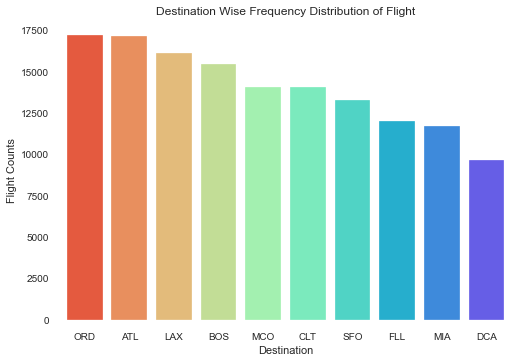

In [26]:
# plot top 10 destinations wise flight frequency

sns.countplot('dest',order=df_nyc_flight['dest'].value_counts().head(10).index,data=df_nyc_flight,palette='rainbow_r')
plt.title('Destination Wise Frequency Distribution of Flight')
plt.ylabel('Flight Counts')
plt.xlabel('Destination')

- **ORD (O'Hare, Chicago) and ATL(Atlanta)** are the top visited destinations from NYC Airport in 2013.

<a id ="section507"></a>
### 5.1.7 Is there any seasonal trend for top destination ORD  from NYC in 2013?

Text(0.5, 1.0, 'Flight frequency across Months in ORD')

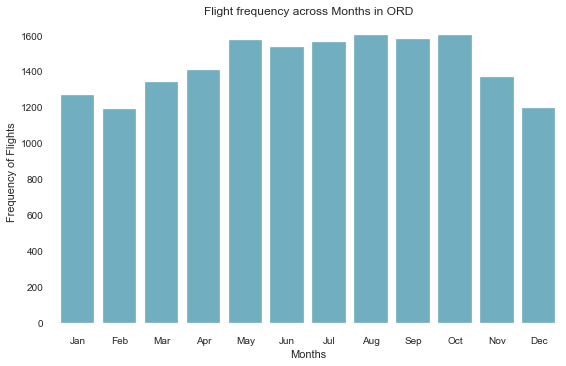

In [27]:
df_ord=df_nyc_flight[df_nyc_flight['dest']=='ORD']
sns.catplot(x="month_desc",kind="count",data=df_ord,order=rowOrder,aspect=14/9,color="c")
plt.xlabel('Months')
plt.ylabel('Frequency of Flights')
plt.title('Flight frequency across Months in ORD')

- **May,Aug, Sep and Oct** months have highest no of flights. 


- The reason behind this could be the **Summer break and foliage fall** in mid october in Chicago.

<a id="section5B"></a>
## 5.2 NYC Flight Delay Analysis

In [28]:
df_dep_flt=df_nyc_flight[df_nyc_flight['dep_status']=='Delayed']
df_dep_flt['month'].value_counts()

7     13773
12    13490
6     12558
8     11665
5     11227
3     11166
4     10484
1     9620 
2     9088 
10    8704 
11    8218 
9     7752 
Name: month, dtype: int64

<a id ="section5B1"></a>
### 5.2.1 Is there any seasonal pattern in flight departure delays?

In [29]:
df_dep_flt=df_nyc_flight[df_nyc_flight['dep_status']=='Delayed']
df_dep_flt['month'].value_counts()

df_arr_flt=df_nyc_flight[df_nyc_flight['arr_status']=='Delayed']

Text(0, 0.5, 'Average Delay Time')

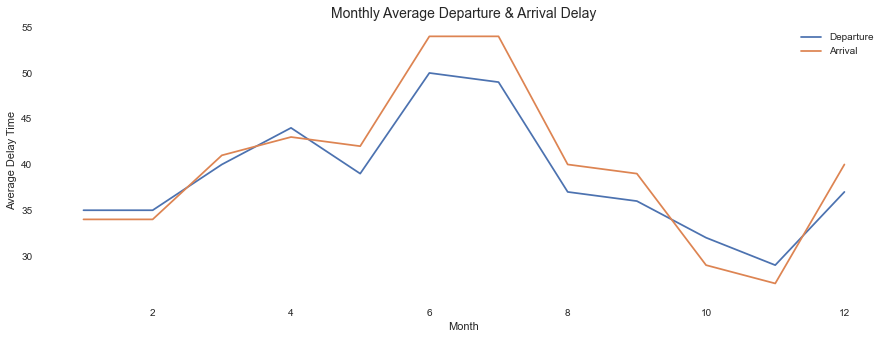

In [30]:
# get average monthly delay 
plt.figure(figsize=(15,5))
avg_mnth_dep_delay = df_dep_flt.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
avg_mnth_dep_delay['dep_delay']=np.round(avg_mnth_dep_delay['dep_delay'],0)

avg_mnth_arr_delay = df_arr_flt.groupby(['month'], as_index=False).agg({'arr_delay': 'mean'})
avg_mnth_arr_delay['arr_delay']=np.round(avg_mnth_arr_delay['arr_delay'],0)

plt.plot('month','dep_delay',data=avg_mnth_dep_delay,label='Departure')
plt.plot('month','arr_delay',data=avg_mnth_arr_delay,label='Arrival')
plt.legend()
plt.title("Monthly Average Departure & Arrival Delay",fontsize=14) 
plt.xlabel("Month")
plt.ylabel("Average Delay Time")

#f,ax=plt.subplots(1,2,figsize=(22,6))
#df_dep_flt['month'].value_counts().plot()
#plt.figure(figsize=(10,5))
#sns.countplot('month',data=df_dep_flt,order=df_dep_flt['month'].value_counts().index.sort_values(),palette='PuBuGn_d'
#              ,ax=ax[0])
#ax[0].set_xticklabels(rowOrder,fontsize=14)
#ax[0].set(ylabel='Count of Flights')
#ax[0].set_title("Flight Frequency for delayed departure",fontsize=14)

#sns.catplot(x='month', y='dep_delay',data=avg_mnth_delay, kind='bar',ax=ax[1])
#sns.countplot('month',data=df_arr_flt,order=df_arr_flt['month'].value_counts().index.sort_values(),ax=ax[1],palette='Greens_d')
#ax[0].set_title("Monthly Average Departure & Arrival Delay",fontsize=14) 
#ax[1].set_title("Flight Frequecy for late Arrival",fontsize=14)
#ax[0].set_xlabel("Month",fontsize=14)
#ax[1].set_xlabel("Month",fontsize=14)
#ax[1].set_xticklabels(rowOrder,fontsize=14)


- Both departure and arrival delay rises in the summer season **( June, July and August)** and again in **December** during holiday season, it implies the problem lies in more number of flights during summer and holiday season.


- **Feb,Sep and Nov** has **lowest delay** in flight.



<a id ="section5B2"></a>
### 5.2.2 How flight departure delays vary over the course of a day?

[ 5  6  7  8 18  9 10 11 12 13 14 15 16 17 19 20 21 22 23]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05]


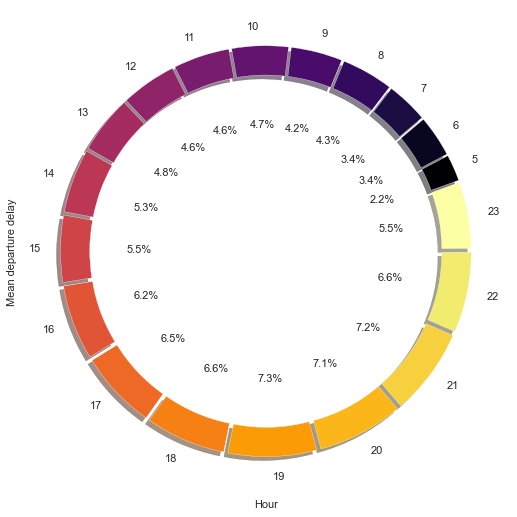

In [31]:
#df_nyc_flight.loc[df_nyc_flight.hour== 24,'hour']=0
print(df_dep_flt['hour'].unique())
#plt.figure(figsize=(25,10))
hourLst=np.empty(len(df_dep_flt['hour'].unique()))
hourLst.fill(0.05)
print(hourLst)                 
#df_nyc_flight.loc[df_nyc_flight.hour == 24 ,'hour'] = 0
delay_grp = df_dep_flt.groupby(['hour'],as_index = True).agg({'dep_delay':'mean'})
delay_grp['dep_delay'].plot(kind='pie',autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                 explode=hourLst, figsize=(13, 9), fontsize=11, 
                                                                 startangle=20, shadow=True, cmap='inferno')
plt.xlabel('Hour')
plt.ylabel('Mean departure delay')
plt.show()

#df_dep=df_nyc_flight.groupby(['hour'],as_index = False).agg({'dep_delay':'mean'})
#df_dep['dep_delay'].plot()

- It depicts that on an average departure delays are at peak in evening between **6:00 p.m. to 10:00 p.m.**


- In previous graphs (section 508), we have seen the peak in flight departure in evening between **6:00 p.m. to 8:00 p.m.**
  So, it implies if there are more no of flight, no of delayed flights will also be more.


<a id ="section5B3"></a>
### 5.2.3 Carrier Wise flight delay analysis

In [32]:
df_dep_flt.groupby('carrier')['carrier'].count()

carrier
9E    6980 
AA    10105
AS    225  
B6    21372
DL    15186
EV    22976
F9    340  
FL    1647 
HA    69   
MQ    7966 
OO    9    
UA    27125
US    4762 
VX    2216 
WN    6535 
YV    232  
Name: carrier, dtype: int64

Text(0.5, 1.0, ' Carrier wise Average Departure Delay')

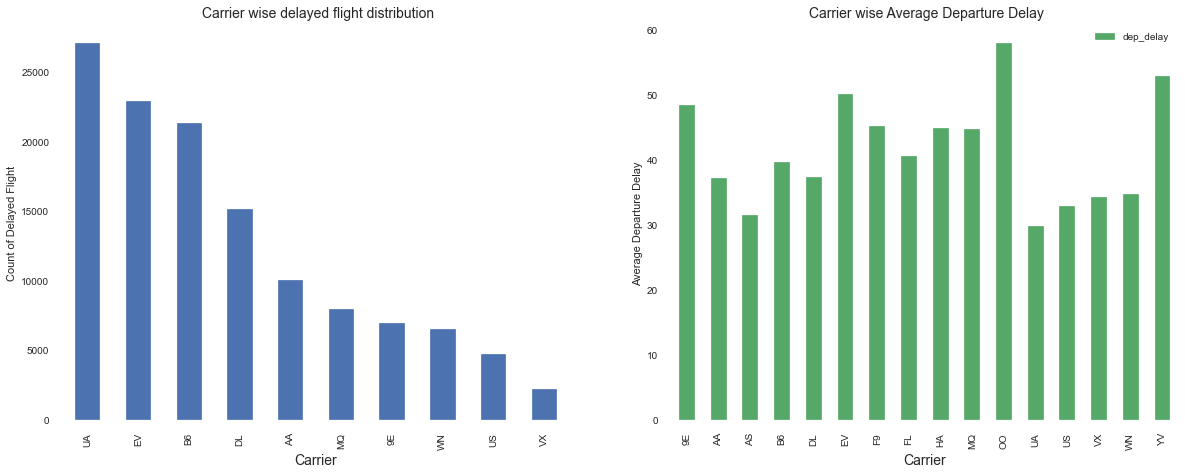

In [33]:
agg_dep_delay=df_dep_flt.groupby(['carrier']).agg({'dep_delay':'mean'})
f,ax=plt.subplots(1,2,figsize=(20,5))
plt.subplots_adjust(top=1.2,bottom=0.1)
df_dep_flt['carrier'].value_counts().head(10).plot(kind="bar",ax=ax[0],fontsize=10)
agg_dep_delay.sort_index().plot.bar(ax=ax[1],color='g')
ax[0].set(ylabel='Count of Delayed Flight ')
ax[0].set_xlabel('Carrier',fontsize=14)
ax[0].set_title(' Carrier wise delayed flight distribution',fontsize=14)

ax[1].set(ylabel='Average Departure Delay ')
ax[1].set_xlabel('Carrier',fontsize=14)
ax[1].set_title(' Carrier wise Average Departure Delay',fontsize=14)

- **UA (United Airlines)** have maximum flight delays and then EV Airlines. Irrespective of maximum delayed flights, **UA** has **lowest average departure delay time**.


- But **OO (SkyWest Airlines), EV, YV and 9E**  has maximum average departure delay which implies that these airlines are worst airlines in respect of delayed flights. Those who dislike delayed fligths should avoid these airlines.


<a id="section5B4"></a>

### 5.2.4 Airport wise Flight Delay Analysis

In [34]:
df_DepAir = df_nyc_flight.groupby('origin')['origin'].count().reset_index(name='total')
delayFlight = df_nyc_flight.loc[df_nyc_flight['dep_status'] == 'Delayed'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
df_DepAir['Delayed'] = delayFlight['Delayed'].values
df_DepAir['percentage'] = (df_DepAir['Delayed']/df_DepAir['total'])*100
#df_DepAir.set_index('origin', inplace=True)
df_DepAir

,origin,total,Delayed,percentage
0,EWR,120366,52414,43.545519
1,JFK,110942,41833,37.707090
2,LGA,104293,33498,32.119126


Text(0, 0.5, 'Flight Delay Percentage(%)')

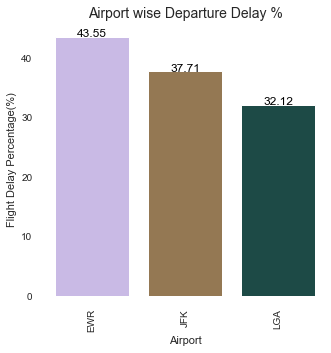

In [35]:
plt.figure(figsize=(5,5))
df_DepAir['percentage'].plot.bar(fontsize=10)
sns.set(style="whitegrid")
g=sns.barplot(data=df_DepAir,y='percentage',x="origin",palette="cubehelix_r")
plt.title("Airport wise Departure Delay %",fontsize=14)
for index, row in df_DepAir.iterrows():
    g.text(row.name,row.percentage, round(row.percentage,2), color='black', ha="center")
plt.xlabel('Airport')
plt.ylabel('Flight Delay Percentage(%)')
#f_DepAir['origin'].plot.pie(ax=ax[1])

- **43% of flights** departed from **EWR (Newark International Airport) delayed** which is highest among three Airports.

<a section="5B5"></a>
### 5.2.5 Carrier/Airline wise Departure Delay versus Arrival Delay Percentage?


In [36]:
df_DepCarrier = df_nyc_flight.groupby('carrier')['carrier'].count().reset_index(name='total')
delayFlight = df_nyc_flight.loc[df_nyc_flight['dep_status'] == 'Delayed'].groupby(['carrier','dep_status'])['dep_status'].count().unstack('dep_status')
delayArrFlt =df_nyc_flight.loc[df_nyc_flight['arr_status'] == 'Delayed'].groupby(['carrier','arr_status'])['arr_status'].count().unstack('arr_status')
df_DepCarrier['Departure_Delay'] = (delayFlight['Delayed'].values/df_DepCarrier['total'])*100
df_DepCarrier['Arrival_Delay']=(delayArrFlt['Delayed'].values/df_DepCarrier['total'])*100

df_DepCarrier=df_DepCarrier.sort_values('total',ascending=False)
df_DepCarrier.drop('total',1,inplace=True)
df_DepCarrier.set_index('carrier',inplace=True)
df_DepCarrier

,Departure_Delay,Arrival_Delay
carrier,,
UA,46.392899,38.007115
B6,39.203889,43.307347
EV,42.607325,45.403802
DL,31.632887,34.188764
AA,31.013105,32.857625
MQ,30.322409,44.509155
US,23.236069,35.859276
9E,38.063038,36.192606
WN,53.407976,43.347499


Text(0.5, 1.0, 'Departure Delay vs Arrival Delay')

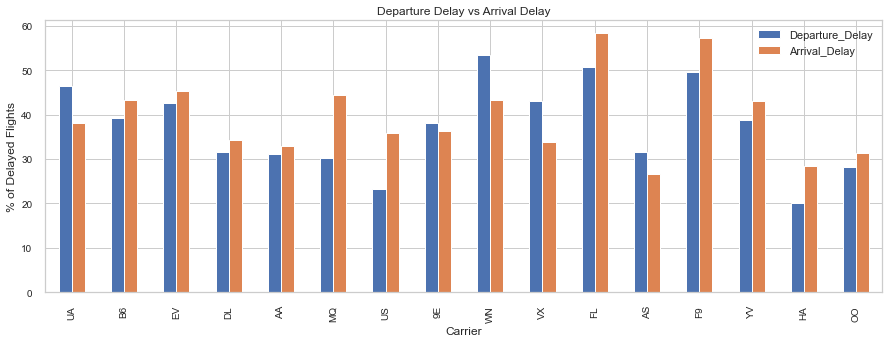

In [37]:
df_DepCarrier.plot.bar(figsize=(15,5),fontsize=10)
plt.xlabel('Carrier')
plt.ylabel('% of Delayed Flights')
plt.title('Departure Delay vs Arrival Delay')


- Approx 50% of flights operated by airlines **WN,FL and F9** departed late from origin.


- Most of the airlines have more arrival delay percentage than departure delay, except **UA,WN and AS**.


- **UA** also has maximum no of flights operating in NYC.

<a section ="5B6"></a>
### 5.2.6 Carrier/Airline Wise Delayed Departure versus On time Arrival of flight which were departed delay

In [38]:
df_DepCarrier = df_nyc_flight.groupby('carrier')['carrier'].count().reset_index(name='total')
delayFlight = df_nyc_flight.loc[df_nyc_flight['dep_status'] == 'Delayed'].groupby(['carrier','dep_status'])['dep_status'].count().unstack('dep_status')
delayArrFlt =df_nyc_flight.loc[(df_nyc_flight['arr_status'] == 'OnTime') & (df_nyc_flight['dep_status'] == 'Delayed')].groupby(['carrier','arr_status'])['arr_status'].count().unstack('arr_status')
df_DepCarrier['Departure_Delay'] = (delayFlight['Delayed'].values/df_DepCarrier['total'])*100
df_DepCarrier['Arrival_OnTime']=(delayArrFlt['OnTime'].values/df_DepCarrier['total'])*100

df_DepCarrier=df_DepCarrier.sort_values('total',ascending=False)
df_DepCarrier.drop('total',1,inplace=True)
df_DepCarrier.set_index('carrier',inplace=True)
df_DepCarrier

,Departure_Delay,Arrival_OnTime
carrier,,
UA,46.392899,17.991038
B6,39.203889,9.054389
EV,42.607325,7.033843
DL,31.632887,10.540130
AA,31.013105,10.548446
MQ,30.322409,3.890221
US,23.236069,4.864838
9E,38.063038,10.497328
WN,53.407976,18.322981


Text(0.5, 1.0, 'Departure Delay vs On Time Arrival of flight which departed delay')

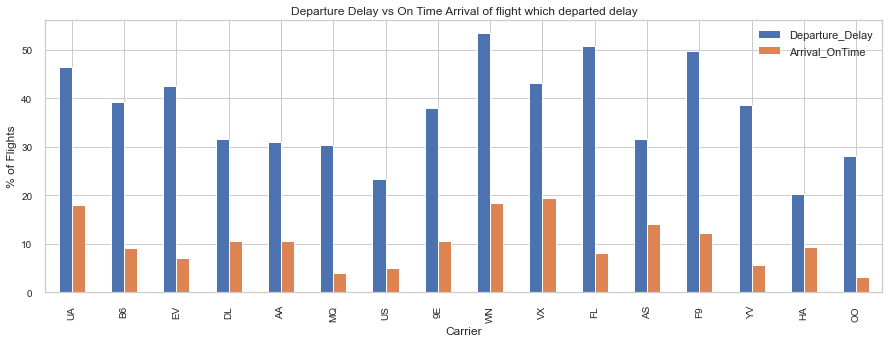

In [39]:
df_DepCarrier.plot.bar(figsize=(15,5),fontsize=10)
plt.xlabel('Carrier')
plt.ylabel('% of Flights')
plt.title('Departure Delay vs On Time Arrival of flight which departed delay')


- For **UA,WN and VX** Airline, approx 40 % of flight departed late, and approx  arrived destination on time.


- The ontime arrival inspite of delayed departure, reasons could be good Aircraft quality, speed or better weather condition. 

<a section ="5B7"></a>
### 5.2.7 Carrier/Airline Wise On Time Departure versus Delayed Arrival of flight which were departed On Time.
      What is the carrier wise ratio of flight which departed on time but arrived late in destination
      

In [40]:
df_DepCarrier = df_nyc_flight.groupby('carrier')['carrier'].count().reset_index(name='total')
#df_DepCarrier['total_Percentage']=(df_DepCarrier['total'].values/df_nyc_flight['month'].count)
delayFlight = df_nyc_flight.loc[df_nyc_flight['dep_status'] == 'OnTime'].groupby(['carrier','dep_status'])['dep_status'].count().unstack('dep_status')
delayArrFlt =df_nyc_flight.loc[(df_nyc_flight['arr_status'] == 'Delayed') & (df_nyc_flight['dep_status'] == 'OnTime')].groupby(['carrier','arr_status'])['arr_status'].count().unstack('arr_status')
df_DepCarrier['Departure_OnTime'] = (delayFlight['OnTime'].values/df_DepCarrier['total'])*100
df_DepCarrier['Arrival_Delayed']=(delayArrFlt['Delayed'].values/df_DepCarrier['total'])*100
print(df_DepCarrier)
df_DepCarrier=df_DepCarrier.sort_values('total',ascending=False)
df_DepCarrier.drop('total',1,inplace=True)
df_DepCarrier.set_index('carrier',inplace=True)


   carrier  total  Departure_OnTime  Arrival_Delayed
0   9E      18338  56.243865         8.626895       
1   AA      32583  67.034957         12.392966      
2   AS      711    68.073136         9.001406       
3   B6      54515  59.941301         13.157846      
4   DL      48007  67.640136         13.096007      
5   EV      53925  52.168753         9.830320       
6   F9      684    49.853801         19.883041      
7   FL      3248   47.044335         15.671182      
8   HA      342    79.824561         17.543860      
9   MQ      26271  64.980397         18.076967      
10  OO      32     62.500000         6.250000       
11  UA      58468  52.433810         9.605254       
12  US      20494  73.528838         17.488045      
13  VX      5147   56.343501         10.277832      
14  WN      12236  45.022883         8.262504       
15  YV      600    52.000000         10.000000      


Text(0.5, 1.0, 'Carrier Wise OnTime Departure vs Delayed Arrival of flight which arrived delay')

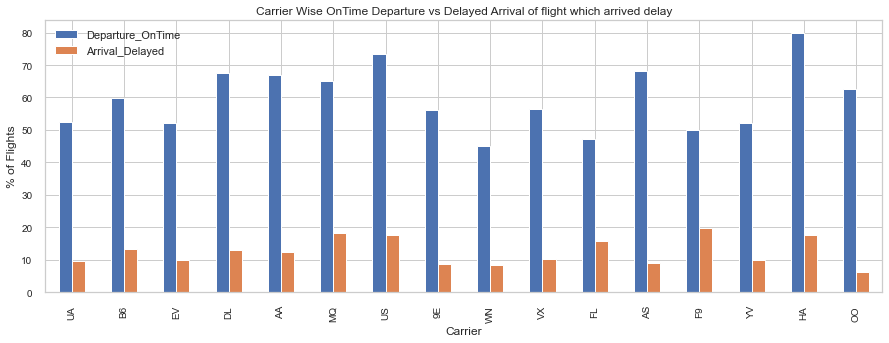

In [41]:
df_DepCarrier.plot.bar(figsize=(15,5),fontsize=10)
plt.xlabel('Carrier')
plt.ylabel('% of Flights')
plt.title('Carrier Wise OnTime Departure vs Delayed Arrival of flight which arrived delay')


- **F9 Airline** operates approx 50% flight on time but approx 20% of flights departed on time arrived late in destination.


- As delay reason is not available. Cause of delay could be 
   - Congestion in Air Traffic.
   - Weather 
   - Airline Quality/glitches

<a section="5B8"></a>
### 5.2.8 Which is best suited Airport for top destination ORD from NYC in 2013?
            

['EWR' 'LGA' 'JFK']


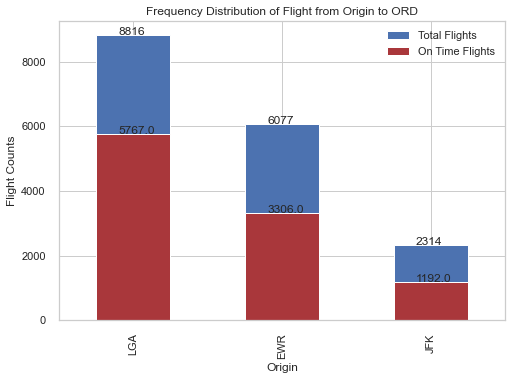

In [42]:
df_ord_ontime=df_nyc_flight.loc[(df_nyc_flight['dest']=='ORD') & (df_nyc_flight['dep_status']=='OnTime')]
#df_ord=df_nyc_flight[(df_nyc_flight['dest']==)]
print(df_ord['origin'].unique())
#df_origin_total=df_nyc_flight.groupby('origin')['origin'].count().reset_index(name='total')
fig,ax=plt.subplots()
df_nyc_flight.loc[(df_nyc_flight['dest']=='ORD')]['origin'].value_counts().plot(kind="bar",ax=ax,label='Total Flights')
df_nyc_flight.loc[(df_nyc_flight['dest']=='ORD') & (df_nyc_flight['dep_status']=='OnTime')]['origin'].value_counts().plot(kind="bar",ax=ax,stacked=True,cmap="vlag_r",label='On Time Flights')
#sns.countplot('origin',order=df_ord['origin'].value_counts().head(10).index,data=df_nyc_flight,palette='rainbow_r')
for p in ax.patches:
    p.get_x()
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() * 1.0))

plt.title('Frequency Distribution of Flight from Origin to ORD')
plt.ylabel('Flight Counts')
plt.xlabel('Origin')
plt.legend()
plt.show()

- **Approx 65% of flights** departed are **On Time** to top destination ORD from **LGA Airport, NYC**


- Other two NYC Airport **(EWR and JFK)** have **approx 50% flight** on time departure to ORD.


- **LGA Airport, NYC** is best suited for those who wants to travel to ORD from NYC in 2013.

<a section="5C"></a>
### 5.3 Which is best airport in NYC in 2013?

  origin   total
0  EWR    120366
1  JFK    110942
2  LGA    104293


Text(0, 0.5, 'Departure Status')

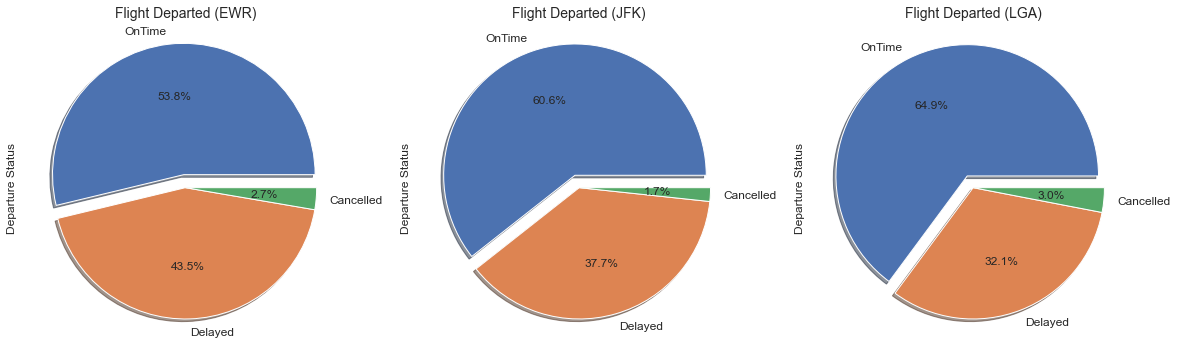

In [43]:
f,ax = plt.subplots(1,3,figsize=(20,7))
df_origin_total=df_nyc_flight.groupby('origin')['origin'].count().reset_index(name='total')
print(df_origin_total)
df_nyc_flight['dep_status'][df_nyc_flight['origin'] == 'EWR'].value_counts().plot.pie(explode=[0.1,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True,fontsize=12)
df_nyc_flight['dep_status'][df_nyc_flight['origin'] == 'JFK'].value_counts().plot.pie(explode=[0.1,0,0],autopct='%1.1f%%',ax=ax[1],shadow=True,fontsize=12)
df_nyc_flight['dep_status'][df_nyc_flight['origin'] == 'LGA'].value_counts().plot.pie(explode=[0.1,0,0],autopct='%1.1f%%',ax=ax[2],shadow=True,fontsize=12)
ax[0].set_title('Flight Departed (EWR)',fontsize=14)
ax[1].set_title('Flight Departed (JFK)',fontsize=14)
ax[2].set_title('Flight Departed (LGA)',fontsize=14)
ax[0].set_ylabel('Departure Status')
ax[1].set_ylabel('Departure Status')
ax[2].set_ylabel('Departure Status')


- **EWR** Airport has maximum delayed flights among other Airport. This is also the busiest airport as it is operating maximum flights.

- Higher number of flights have higher chance of extreme waiting situation. 

- **LGA** Airport having lowest flight frequency, shows maximum ontime flights(64.9%) and flight cancellation(3%) . 

- **1.7% flights** got **cancelled from JFK** which is **lowest** among all.

<Figure size 1728x1080 with 0 Axes>

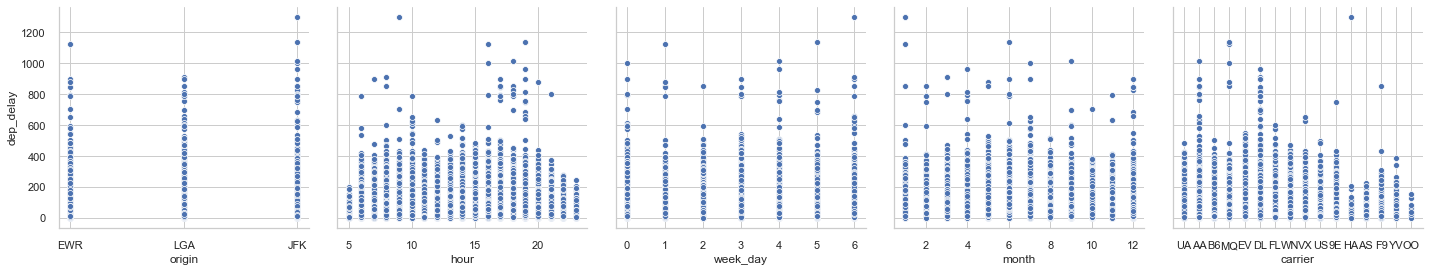

In [91]:
plt.figure(figsize=(24,15))
df_departure_delay=df_nyc_flight.loc[df_nyc_flight['dep_status']=='Delayed']
xvars=['origin','hour','week_day','month','carrier']
yvars=['dep_delay']
sns.pairplot(df_departure_delay,x_vars=xvars,y_vars=yvars,height =4)
plt.show()

Text(0.5, 1.0, 'Correlation between features')

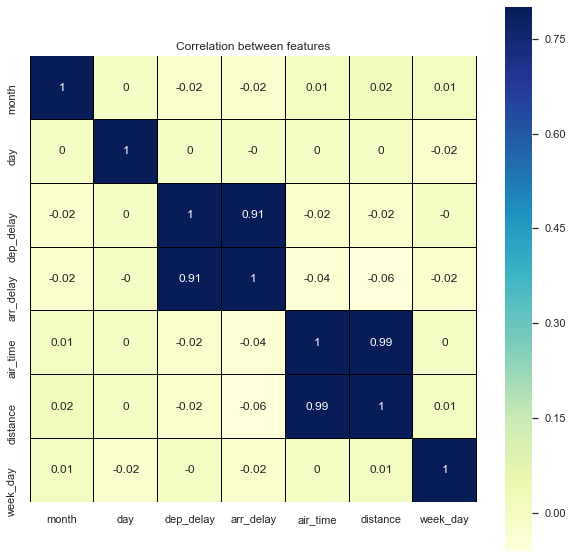

In [45]:
flt_corr= df_nyc_flight.drop(['dep_time','sched_dep_time','arr_time','sched_arr_time','hour','minute',
                              'flight'], axis=1)
corr=flt_corr.corr()
plt.figure(figsize=(10,10))
sns.heatmap(round(corr,2),vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- **Departure and Arrival Delay** are **positively and highly correlated**.


- **Air Time and Distance** are also **positively and hightly correlated.**

<a section="600"></a>
### 6. Conclusion

 ***All the observations are for year 2013**

- This New York(NYC) Flight Data set helps us to observe NYC Flights pattern and Flight Delay Analysis.

- It is observed that **EWR (Newark International Airport)** is the **busiest** Airport among all three Airports.__(From Section 5.5.1)__. Being busiest airport, __approx 43% of flights departed delay from EWR__, highest flight delayed percentage among all. 

- **LGA** has maximum percentage of On time Flights.**JFK and LGA** has more than 60% of flights departed on time.
 
- **UA , the largest carrier**, operating maximum number of flights from New York, USA in 2013. __(From Section 5.5.2)__

- It is observed that there is peak in no.of flights and also departure delay in  __July and August__ and then in month __October and December__, because, of holiday season in former and festive season in later. It implies higher the number of flights more is the departure delay.

- As July, August,October and December have maximum flights, so people can book their tickets in advance to make there vacation bit economical.

- Over course of day, peak in flights and flights departed late are observed between __6:00 p.m. to 10 p.m.__.

- **Thursday and Monday** being busiest days,people can avoid these days for travelling, as higher the flight frequency more the flight delay.

- The dataset does not provide the reasons for Delays, so we dont have proper understanding of the delay issues. There might be different reason for Flight Delays. Some of them are:

     - Airline glitches. The top cause of flight delays, according to a USA TODAY analysis.
     - Congestion in air traffic
     - Earthquakes and tsunamis 
     - Fueling
     - Inclement weather, such as thunderstorm, hurricane, or blizzard
     - Late arrival of the aircraft to be used for the flight from a previous flight
     - Maintenance problems with the aircraft
     - Security issues
     - Terrorist attacks 

<a section="700"></a>
### 7. Actionable Insights

- Optimizing Airport Organization by implementing **Delay prevention model.**
    
- Airport Maintenance like Airfield Pavements,Runway, Signs ,fuelling facilities,Hangars etc. should be taken care at the month/course of day when flights frequency are less.
    
- By Using **Advance technology** to analyze the most common delay reasons and their chainning impact,which can help in increasing their operational efficiency.

- Flight Delays can be reduced by **collaborative approach of Airport,Airlines,ATC Controller** for effective **decision making.**

- As we analysed, there are some flights which departed late but arrived on time and some flights which departed on time but arrived late. **A small buffering** can be introduced on scheduled timings. 

